# 读取包和设好环境

In [1]:
from IPython.display import display
from IPython.display import clear_output
import PIL
import numpy as np
import time
import os
from matplotlib.pyplot import imshow
%matplotlib inlinenljhlhjlh
import matplotlib.pyplot as plt
import gc
import sys
from matplotlib import cm
import seaborn as sns
import tensorflow as tf
import tensorlayer as tl

In [2]:
tf.reset_default_graph()

In [3]:
tf.logging.set_verbosity(tf.logging.DEBUG)
tl.logging.set_verbosity(tl.logging.DEBUG)

In [4]:
sess = tf.InteractiveSession()

In [ ]:
start_time = time.time()
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))

tf.reset_default_graph()
sess = tf.InteractiveSession()
# prepare data
# X_train, y_train, X_val, y_val, X_test, y_test = tl.files.load_mnist_dataset(shape=(-1, 784))

# define placeholder
x = tf.placeholder(tf.float32, shape=[None, 31, 501, 501, 1], name='x')
y_ = tf.placeholder(tf.float32, shape=[None, 30, 501, 501, 1], name='y_')

# define the network
network = tl.layers.InputLayer(x, name='input')
# network = tl.layers.ConvLSTMLayer(network, filter_size=(3, 3), n_steps=30, initial_state=tf.zeros((None, 501, 501, 2), dtype=tf.float32))
network = tl.layers.ConvLSTMLayer(network, filter_size=(3, 3), n_steps=30, initial_state=None, cell_shape=(501, 501))

# 数据读取

In [5]:
raw_RAD_id_list = os.listdir('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/')
print(len(raw_RAD_id_list))

5000


In [6]:
def check_RAD_id(RAD_id):
    sum_list = []
    for k in range(61):
        sum_list.append(np.array(PIL.Image.open('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png'
                         % (RAD_id, RAD_id,
                        k))).astype(np.int8).ravel().sum())
    sum_list = np.array(sum_list)
    if i % 100 == 0:
        print(time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)))
        print(i, sum_list[:7])
    if sum_list.mean() < 251001 * 0:
        return False
    for k in range(59):
        if abs(sum_list[k] + sum_list[k + 2] - 2 * sum_list[k + 1]) > 251001 * 2:
            return False
    return True

In [7]:
start_time = time.time()
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
RAD_id_list = []
for (i, RAD_id) in enumerate(raw_RAD_id_list):
    if check_RAD_id(RAD_id):
        RAD_id_list.append(RAD_id)
print(time.strftime('end time: %Y-%m-%d %H:%M:%S', time.localtime()))
print(time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)))
print(len(RAD_id_list))

start time: 2018-08-12 16:48:37
00:00:00
0 [-218731 -223051 -219804 -220007 -214895 -215379 -215980]
00:00:04
100 [234582 237819 229433 245301 248393 240381 223353]
00:00:09
200 [160256 204332 211280 280902 295750 352426 358017]
00:00:13
300 [-176391 -152608 -144375 -133992 -118109 -105886 -106325]
00:00:17
400 [908957 957476 934137 916795 906131 913580 938224]
00:00:22
500 [-206606 -212619 -218223 -216854 -223904 -219665 -226577]
00:00:26
600 [-161574 -161458 -165310 -164261 -163069 -169710 -168272]
00:00:30
700 [1951344  188499  171837  151332  150477  142457  124003]
00:00:35
800 [-69382 -51706 -30304 -12627  12087  15137  41947]
00:00:39
900 [-214099 -212040 -207336 -200398 -191997 -194556 -193007]
00:00:44
1000 [1376909 1436172 1463413 1498177 1520122 1560300 1615684]
00:00:48
1100 [-146327 -148117 -148605 -150131 -150245 -151917 -154946]
00:00:52
1200 [107576 122831 104013  90320 113905 101212 101117]
00:00:57
1300 [ 16077  23864  16170   5567   -683  -4791 -22141]
00:01:01
1400 

In [ ]:
a = np.array(sum_list)

In [ ]:
a.mean()

In [ ]:
a.var()

In [ ]:
l = list(range(20))

In [ ]:
l

In [ ]:
for i, j in enumerate(l):
    print(i, j)
    del l[i]
    continue

In [ ]:
l

In [ ]:
'/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train'

In [ ]:
RAD_id = 'RAD_436582464219533'
a = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 10))).astype(np.int8)

In [ ]:
a = a.reshape((501, 501, 1))

In [ ]:
a.shape

In [ ]:
b = np.empty((2, 501, 501, 1))

In [ ]:
b[0] = a

In [ ]:
plt.imshow(a, cmap=cm.gist_ncar_r)

In [145]:
def read_by_RAD_id(RAD_id, step_size):
    x_matrix = np.empty((31, 501, 501, 1))
    for i in range(31):
        x_matrix[i] = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i))).astype(np.int8).reshape((501, 501, 1))
    y_matrix = np.empty((501, 501, 1))
    y_matrix = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 31))).astype(np.int8).reshape((501, 501, 1))
    return ([x_matrix], [y_matrix])

In [ ]:
tf.contrib.rnn.ConvLSTMCell()

In [138]:
class A(tf.contrib.rnn.ConvLSTMCell):
    grade = ''
    def __init__(self, conv_ndims, input_shape, output_channels, kernel_shape, use_bias=True, skip_connection=False, forget_bias=1.0, initializers=None, name='conv_lstm_cell'):
        tf.contrib.rnn.ConvLSTMCell.__init__(self, conv_ndims, input_shape, output_channels, kernel_shape, use_bias=True, skip_connection=False, forget_bias=1.0, initializers=None, name='conv_lstm_cell')
        self.__name__ = self.name

In [ ]:
tl.layers.recurrent.BasicConvLSTMCell()

In [162]:
all_start_time = time.time()
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))

tf.reset_default_graph()
sess = tf.InteractiveSession()
# prepare data
# X_train, y_train, X_val, y_val, X_test, y_test = tl.files.load_mnist_dataset(shape=(-1, 784))

# define placeholder
x = tf.placeholder(tf.float32, shape=[None, 31, 501, 501, 1], name='x')
y_ = tf.placeholder(tf.float32, shape=[None, 501, 501, 1], name='y_')

# define the network
network = tl.layers.InputLayer(x, name='input')
# network = tl.layers.ConvLSTMLayer(network, filter_size=(5, 5), n_steps=30, cell_shape=(501, 501), feature_map=24, name='conv_lstm_1')
network = tl.layers.ConvLSTMLayer(network, filter_size=(2, 2), cell_shape=(501, 501), feature_map=1, name='conv_lstm_2', return_last=True)
# network = tl.layers.convolution.Conv3dLayer(network, act=tf.nn.tanh, shape=(31, 1, 1, 1, 1), strides=(1,1,1,1,1), padding='VALID')
# network = tl.layers.shape.ReshapeLayer(network, (None, 501, 501, 1))
# network = tl.layers.convolution.Conv2dLayer(network, act=tf.nn.tanh, shape=(5, 5, 1, 1))
# network = tl.layers.ConvLSTMLayer(network, filter_size=(2, 2), n_steps=5, cell_shape=(501, 501), cell_fn=A(2, [501, 501, 1], 5, [2, 2]), feature_map=1, name='conv_lstm_1')
# network = tf.contrib.rnn.ConvLSTMCell(2, [501, 501, 1], 5, [2, 2])


# define cost function and metric.
y = network.outputs
# cost = tf.losses.mean_squared_error(y, y_, weights=y_)
cost = tf.losses.mean_squared_error(y, y_)

# define the optimizer
train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost, var_list=train_params)

# initialize all variables in the session
tl.layers.initialize_global_variables(sess)

# print network information
network.print_params()
network.print_layers()

n_epoch = 100
batch_size = 500
print_freq = 5
sum_cost = 0

# for epoch in range(n_epoch):
#     start_time = time.time()
#     for i, RAD_id in enumerate(RAD_id_list[:1]):
#         X_train, Y_train = read_by_RAD_id(RAD_id, 5)
#         feed_dict = {x: X_train, y_: Y_train}
#         feed_dict.update(network.all_drop)  # enable noise layers
#         train_cost, _ = sess.run([cost, train_op], feed_dict=feed_dict)
#         sum_cost += train_cost / (Y_train[0].sum() + 251001)
#         if i % 100 == 0:
#             print('%3d'%epoch, '%5d'%i, time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)), '%.20f'%(sum_cost))
#             sum_cost = 0
            
X_train, Y_train = read_by_RAD_id(RAD_id_list[0], 5)
for epoch in range(n_epoch):
    feed_dict = {x: X_train, y_: Y_train}
    feed_dict.update(network.all_drop)  # enable noise layers
    train_cost, _ = sess.run([cost, train_op], feed_dict=feed_dict)
    sum_cost += train_cost / (Y_train[0].sum() + 251001)
    if epoch % 10 == 0:
        print('%3d'%epoch, '%5d'%i, time.strftime('%H:%M:%S', time.gmtime(time.time() - all_start_time)), '%.20f'%(sum_cost))
    sum_cost = 0
            
#     if epoch + 1 == 1 or (epoch + 1) % print_freq == 0:
#         print("Epoch %d of %d took %fs" % (epoch + 1, n_epoch, time.time() - start_time))
#         train_loss, train_acc, n_batch = 0, 0, 0
#         for X_train_a, y_train_a in tl.iterate.minibatches(X_train, y_train, batch_size, shuffle=True):
#             dp_dict = tl.utils.dict_to_one(network.all_drop)  # disable noise layers
#             feed_dict = {x: X_train_a, y_: y_train_a}
#             feed_dict.update(dp_dict)
#             err, ac = sess.run([cost, acc], feed_dict=feed_dict)
#             train_loss += err
#             train_acc += ac
#             n_batch += 1
#         print("   train loss: %f" % (train_loss / n_batch))
#         print("   train acc: %f" % (train_acc / n_batch))
#         val_loss, val_acc, n_batch = 0, 0, 0
#         for X_val_a, y_val_a in tl.iterate.minibatches(X_val, y_val, batch_size, shuffle=True):
#             dp_dict = tl.utils.dict_to_one(network.all_drop)  # disable noise layers
#             feed_dict = {x: X_val_a, y_: y_val_a}
#             feed_dict.update(dp_dict)
#             err, ac = sess.run([cost, acc], feed_dict=feed_dict)
#             val_loss += err
#             val_acc += ac
#             n_batch += 1
#         print("   val loss: %f" % (val_loss / n_batch))
#         print("   val acc: %f" % (val_acc / n_batch))

# print('Evaluation')
# test_loss, test_acc, n_batch = 0, 0, 0
# for X_test_a, y_test_a in tl.iterate.minibatches(X_test, y_test, batch_size, shuffle=True):
#     dp_dict = tl.utils.dict_to_one(network.all_drop)  # disable noise layers
#     feed_dict = {x: X_test_a, y_: y_test_a}
#     feed_dict.update(dp_dict)
#     err, ac = sess.run([cost, acc], feed_dict=feed_dict)
#     test_loss += err
#     test_acc += ac
#     n_batch += 1
# print("   test loss: %f" % (test_loss / n_batch))
# print("   test acc: %f" % (test_acc / n_batch))
print(time.strftime('end time: %Y-%m-%d %H:%M:%S', time.localtime()))
print(time.strftime('%H:%M:%S', time.gmtime(time.time() - all_start_time)))

start time: 2018-08-13 18:34:45
[TL] InputLayer  input: (?, 31, 501, 501, 1)
[TL] Conv3dLayer cnn3d_layer: shape: (31, 1, 1, 1, 1) strides: (1, 1, 1, 1, 1) pad: VALID act: tanh


TypeError: Failed to convert object of type <class 'tuple'> to Tensor. Contents: (None, 501, 501, 1). Consider casting elements to a supported type.

In [61]:
a = tf.zeros([1, 2], dtype=tf.float32)

In [19]:
Y_train[0][0].reshape((501, 501))

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

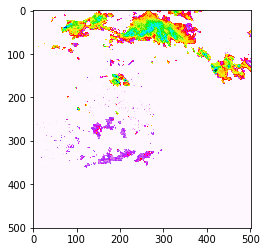

In [20]:
plt.imshow(Y_train[0][0].reshape((501, 501)), cmap=cm.gist_ncar_r)

In [ ]:
tl.utils.predict(sess, network, x_train, x, y_op)

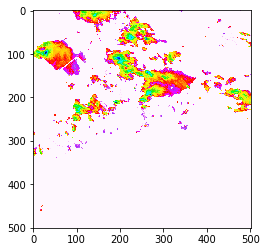

↓↓↓下面的是模型的0输出，上面的是0真实值↑↑↑


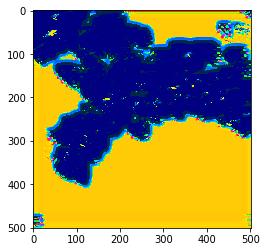


------------------------------------



In [147]:
y = network.outputs
for i, RAD_id in enumerate(RAD_id_list[0:1]):
    X_validation, Y_validation = read_by_RAD_id(RAD_id, 5)
    Y = tl.utils.predict(sess, network, X_validation, x, y)
    Y = Y[0]
    Y_validation = Y_validation[0]
    plt.imshow(Y_validation.reshape((501,501)), cmap=cm.gist_ncar_r)
    plt.show()
    print('↓↓↓下面的是模型的%d输出，上面的是%d真实值↑↑↑' % (j, j))
    plt.imshow(Y.reshape((501,501)), cmap=cm.gist_ncar_r)
    plt.show()
    print('\n------------------------------------\n')

In [ ]:
Y

In [ ]:
plt.imshow(y_train[0].reshape((501,501)), cmap=cm.gist_ncar_r)

In [ ]:
y_train[0]